<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/Classification_LR%2CKNN_ict_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#check if they purchased or not

In [5]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
data.shape

(400, 5)

In [7]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
#no missing values here

In [10]:
#gender to be encoded ...there is categorical values

In [11]:
#scaling to be done...because estimated salary has large values than age

In [12]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
#no need to bother about the user id

In [14]:
#one hot encoding done to gender

In [15]:
data['User ID'].nunique()

400

In [16]:
#out of 400 values 400 are unique...

In [17]:
y=data['Purchased']#target
x=data[['Gender', 'Age', 'EstimatedSalary']]#feature

In [18]:
#encoding
x=pd.get_dummies(x)

In [19]:
x.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [20]:
#model without scaling

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
#now going to create a logistic regression model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg_reg=LogisticRegression()

In [26]:
lg_reg.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=lg_reg.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [29]:
accuracy_score(y_test,y_pred)

0.65

In [30]:
confusion_matrix(y_test,y_pred)

array([[52,  0],
       [28,  0]])

In [31]:
y_pred #nothing is 1...not any true positive...false negative are 28 and true postive are 52

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mn=MinMaxScaler()

In [34]:
x.loc[:,['Age','EstimatedSalary']]=mn.fit_transform(x[['Age','EstimatedSalary']])

In [35]:
x.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,0.023810,0.029630,0,1
1,0.404762,0.037037,0,1
2,0.190476,0.207407,1,0
3,0.214286,0.311111,1,0
4,0.023810,0.451852,0,1


In [36]:
#all are scaled

In [37]:
#now do the same procedure

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
lg_reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred1=lg_reg.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred1)

0.875

In [42]:
confusion_matrix(y_test,y_pred1)

array([[51,  1],
       [ 9, 19]])

In [43]:
accuracy_score(y_test,y_pred1)

0.875

In [44]:
recall_score(y_test,y_pred1)

0.6785714285714286

In [45]:
f1_score(y_test,y_pred1)

0.7916666666666667

In [46]:
precision_score(y_test,y_pred1)

0.95

In [47]:
#KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
metric_k=[]#empty list created
neighbors=np.arange(3,14)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)#p=1 manhattan,p=2 euclidean based
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

In [50]:
metric_k

[0.9125,
 0.9125,
 0.925,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375]

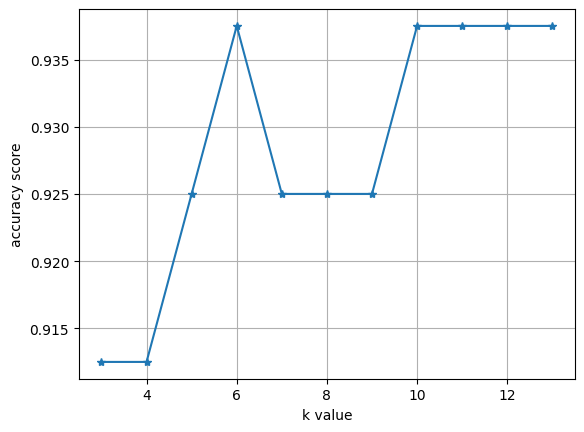

In [51]:
plt.plot(neighbors,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()
plt.show()

In [52]:
#now make model using k=6

In [53]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)#p=1 manhattan,p=2 euclidean based
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [54]:
y_pred_knn=classifier.predict(x_test)

In [55]:
confusion_matrix(y_test,y_pred_knn)

array([[49,  3],
       [ 2, 26]])

In [56]:
accuracy_score(y_test,y_pred_knn)

0.9375

In [57]:
precision_score(y_test,y_pred_knn)

0.896551724137931

In [58]:
recall_score(y_test,y_pred_knn)

0.9285714285714286

In [59]:
f1_score(y_test,y_pred_knn)

0.912280701754386

In [60]:
#SVM

In [61]:
from sklearn.svm import SVC

In [62]:
#sv=SVC()
#there are so many kernels if you didn't apply the kernel needed it uses the default kernel RDF

In [63]:
sv=SVC(kernel='linear')

In [64]:
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [65]:
y_pred_svc=sv.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred_svc)

0.875

In [67]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
confusion_matrix(y_test,y_pred_svc)

array([[51,  1],
       [ 9, 19]])

In [69]:
recall_score(y_test,y_pred_svc)

0.6785714285714286

In [70]:
f1_score(y_test,y_pred_svc)

0.7916666666666667

In [71]:
sv1=SVC(kernel='poly',degree=2)

In [72]:
sv1.fit(x_train,y_train)

SVC(degree=2, kernel='poly')

In [73]:
y_pred_svc_1=sv1.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred_svc_1)

0.9125

In [75]:
confusion_matrix(y_test,y_pred_svc_1)

array([[49,  3],
       [ 4, 24]])

In [76]:
sv2=SVC(kernel='rbf')

In [77]:
sv2.fit(x_train,y_train)

SVC()

In [78]:
y_pred_svc_2=sv2.predict(x_test)

In [79]:
accuracy_score(y_test,y_pred_svc_2)

0.925

In [80]:
confusion_matrix(y_test,y_pred_svc_2)

array([[49,  3],
       [ 3, 25]])

In [81]:
#Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [83]:
y_pred_gnb=gnb.predict(x_test)

In [84]:
accuracy_score(y_test,y_pred_gnb)

0.925

In [86]:
confusion_matrix(y_test,y_pred_gnb)

array([[50,  2],
       [ 4, 24]])